## Student Name: Joshua Talamayan

In [16]:
#import any required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel


In [17]:
from google.colab import files
upload = files.upload()

Saving house_prices_train.csv to house_prices_train (1).csv


# **Step 1 - Data Acquisition**

Load the training data 'house_prices_train.csv' into a dataframe. Explore the data to get a better understanding of its structure and any data preparation steps that you need to perform.

In [18]:
#Load the data and view the dimensions

url      = 'house_prices_train.csv' #TODO: provide the url for the training data
data     = pd.read_csv(url)
data_dim = data.shape

print ('There are {} rows and {} columns.'.format(data_dim[0], data_dim[1]))

There are 1460 rows and 81 columns.


Lets view samples of the data

In [19]:
#view a few observations
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#Use your intuition!

At first glance is there any field that, without a doubt, will not contribute to the predictions?

In [20]:
#TODO: remove/exclude the unnecessary field(s) that will not contribute towards the prediction

del data['PoolQC']
del data['MiscFeature'] 
del data['Alley']
del data['Fence'] 
del data['FireplaceQu']
del data['MiscVal']

#**Step 2 - Data Exploration**



*   Gather summary/descriptive statistics and inspect **all the fields**. This can help you to identify outliers and detect any inconsistencies
*   View the frequency of missing values.



In [21]:
#TODO: gather descriptive statistics to view the range of values in each field.
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,12.000000,2010.000000,755000.000000


In [22]:

#TODO: show the frequency of missing values
data.isna().sum().sort_values(ascending=False)[:15]

LotFrontage     259
GarageCond       81
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrType        8
MasVnrArea        8
Electrical        1
YearBuilt         0
dtype: int64


#**State your observations about the summary statistics and missing values (in this cell):**
- Most variables contain data for all people. Most data is consistent, however contains some outliers.
- Most variables that have missing data revolve around parts of the house that are extensions of a standard house (i.e. garage, basement). It seems that the data for garage/basement is considered "missing" if someone did not have a garage. These values will be addessed by replacing 'missing' values with the median for continuous variables and 'NotApp' for categorical variables.

Note: recall that not all missing values need to be deleted, some of them can be imputed.

**The continuous and categorical independent variables**

List the continuous and categorical data and state any discrepancy between the number of expected records in the dataset and the count that is reported above.

For the fields that are discussed, view data_description.txt which explains the range of values for each field. What does this tell you about these 'missing' values. How do you recommend addressing them? **(You do not need to demonstrate your recommendations)**

**The dependent variable**

Are there any discrepancies with the dependent variable? Plot a histogram showing its distribution. Is the distribution skewed?

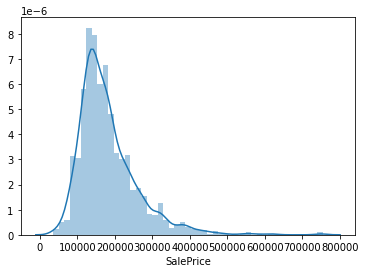

In [23]:
#TODO: Plot the histogram
sns.distplot(data['SalePrice']);


#**Building the Pipeline**
Based on your recommendations above, lets build a pipeline that does the following:

*   prepare the data and perform data imputation
*   transform the continuous and categorical data (scaling and encoding respectively)
*   select the useful features e.g. feature selection, *you can optionally include this in the pipeline or perform this step prior to building the pipeline*
*   build, train and evaluate the neural network using Keras.
*   perform hyper-parameter tuning using RandomSearchCV **(optional)**
*   make predictions with new data







# **Step 3 - Data Preparation**

NOTE: You can modify the cell below to suit your needs. However, ensure that the preprocessing steps that you perform is done in the data frame e.g. `data`

In [24]:

#impute missing continuous values with the median and scale the data

continuous_features  = ['OverallCond', 'LotArea','OverallQual', 'YearBuilt', 'YrSold'] #TODO: provide a list of continuous fields that will be used in the model(except the dependent variable)
continous_transformer = Pipeline(
    steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
    ])

#impute the NA categorical values and encode the data

categorical_features = ['BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond'] #TODO: provide a list of categorical fields that will be used in the model
categorical_transformer = Pipeline(
    steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'NotApp')), #Use an alternative value to indicate NA in the dataset
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ])

data_preprocessor   = ColumnTransformer(
    transformers = [
        ('continious', continous_transformer, continuous_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

#NOTE: the steps above will not be performed until we call `fit_transform` (in the next cell).

#**Step 4 - Data Transformation & Feature Selection**

In [25]:
data_prep_pipeline  = Pipeline(steps=[('preprocessor', data_preprocessor), #This performs the data preparation steps in the cell above
#                     ('feature_selection',#TODO: identify a feature selection algorithm or exclude this line if you have previously performed feature selection on the data.
#                                                          ), 
                    ])

transformed_data    = data_prep_pipeline.fit_transform(data.iloc[:, :-1], data['SalePrice']) #transform the data

#**Step 5 - Building The Model**

**Build the neural network using Keras**

Build a feed forward neural network with: an input layer, hidden layers and one output layer.

In [91]:
X = transformed_data #this is the transformed data from the pipeline
y = data['SalePrice'] #this is the output

#Build a sequential model with at least three dense layers (you can add more layers as needed)
#Note: you can also add this keras model to the data preprocessing pipeline but we can skip that step for now.
ffnn_model = Sequential()
ffnn_model.add(Dense(40, activation='relu', input_shape=(X.shape[1],))) #X.shape[1] is the number of selected features 

#TODO: Add the first hidden layer with a suitable number of units/neurons and the 'relu' activation function
ffnn_model.add(Dense(50, activation='relu'))

#TODO: Add the second hidden layer with a suitable number of units/neurons and the 'relu' activation function
ffnn_model.add(Dense(32, activation='relu'))

#TODO: Add the output layer
ffnn_model.add(Dense(1))

optimizer = keras.optimizers.Adam(lr=0.1)

ffnn_model.compile(optimizer= optimizer, #TODO: state the optimize
                   loss= "mean_squared_error",      #TODO: state the loss function
                   metrics= ["accuracy"]    #TODO: state the metric
                  )

ffnn_history = ffnn_model.fit(X, y, 
                              validation_split= .15, #TODO: state the validation split
                              epochs= 20, #TODO: state the number of epochs (you may need to run the model a few times to find a suitable value)
                              batch_size= 100, #TODO: state the number of observations to use in each batch
                              verbose=1)

Train on 1241 samples, validate on 219 samples
Epoch 1/20
1241/1241 [==============================] - 0s 126us/step - loss: 34403268115.3908 - accuracy: 0.0000e+00 - val_loss: 6619461540.8219 - val_accuracy: 0.0000e+00
Epoch 2/20
1241/1241 [==============================] - 0s 21us/step - loss: 5998641062.8848 - accuracy: 0.0000e+00 - val_loss: 4467988487.0137 - val_accuracy: 0.0000e+00
Epoch 3/20
1241/1241 [==============================] - 0s 20us/step - loss: 2996318076.5963 - accuracy: 0.0000e+00 - val_loss: 2123351074.7763 - val_accuracy: 0.0000e+00
Epoch 4/20
1241/1241 [==============================] - 0s 21us/step - loss: 2084983642.1467 - accuracy: 0.0000e+00 - val_loss: 1857395188.3105 - val_accuracy: 0.0000e+00
Epoch 5/20
1241/1241 [==============================] - 0s 22us/step - loss: 1865829560.3674 - accuracy: 0.0000e+00 - val_loss: 1857386515.2877 - val_accuracy: 0.0000e+00
Epoch 6/20
1241/1241 [==============================] - 0s 19us/step - loss: 1777925643.6035 - a

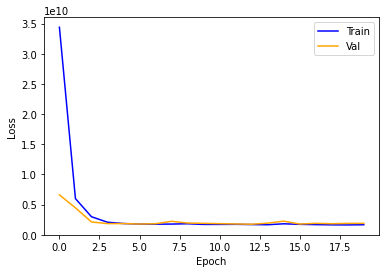

In [92]:
# Visualize the training and validation loss
plt.plot(ffnn_history.history['loss'], 'b', ffnn_history.history['val_loss'], 'orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

**Let's use the neural network to make predictions!**

**Load the test data**

In [93]:
from google.colab import files
upload = files.upload()

Saving house_prices_test.csv to house_prices_test.csv


In [94]:
#TODO: Load the data from `house_prices_test.csv`
test_data_url = 'house_prices_test.csv'
test_data = pd.read_csv(test_data_url)

In [95]:
del test_data['PoolQC']
del test_data['MiscFeature'] 
del test_data['Alley']
del test_data['Fence'] 
del test_data['FireplaceQu']
del test_data['MiscVal']

**Prepare the test data using the pipeline**

This will impute any missing values and scale/encode the fields.

In [96]:
prep_test_data = data_prep_pipeline.transform(test_data)

**Use the neural network to make predictions**

In [97]:
result = ffnn_model.predict(prep_test_data) #TODO: provide the preprocessed test data (above)

#**Summary**

Display samples of the predictions from your model and summarize your thoughts on the model's performance, the training process and its ability to generalize with new data. What are your recommendations to improve the model in the future?

In [98]:
print(result)

[[131733.05 ]
 [154885.45 ]
 [148123.53 ]
 ...
 [151962.69 ]
 [130256.984]
 [211368.27 ]]


Based on the samples shown in the results, it seemed that the model was able to identify that the average sales price of a house was between 100,000 to 200,000. I believe that the model did a good job generalizing with the new data, however it seemed that the performance could have been improved since the average sales price of a house was 180,000 in the training set, where it did not seem that the model could have produced a similar result. I believe that the model could be improved if we increased the amount of hidden layers or added more data in order for the model to predict more accurately. 